In [4]:
from sympy import *
import sympy
import math
import numpy as np
from IPython.display import display

In [16]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## 求导

$e^{x^2}$求一阶导，$x^4$求三阶导

In [17]:
diff(exp(x**2), x), diff(x**4, x, 3)    #求3阶导

#### 求偏导

In [24]:
expr = exp(x*y*z)
display(expr)
display(diff(expr, x, y, y, z, z, z, z))    #x一阶y二阶z四阶
#diff(expr, x, y, 2, z, 4)
#diff(expr, x, y, y, z, 4)

expr.diff(x, y, 2, z, 4)    #也可直接命令求导

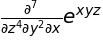

In [21]:
deriv = Derivative(expr, x, y, y, z, 4)
display(deriv)
deriv.doit()

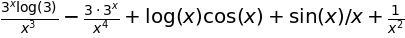

In [25]:
display(diff(sin(x) * ln(x) - 1 / x + 3 ** x / x ** 3 + tan(E), x))   #E为自然底数e
diff(E ** y + x * y - E, x)

#### 泰勒展开

In [27]:
expr = exp(sin(x))
display(expr)
expr.series(x, 0, 4)    #在0点四阶展开

In [28]:
x0 = symbols("x0")
expr.series(x, x0, 4)

## 积分

求积分：$\int_0^{+\infty}e^{-x}\text{d}x$

In [6]:
integrate(exp(-x), (x, 0, oo))    #对x从0到正无穷积分

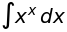

In [15]:
integrate(x**x, x)    #无法求得则原样返回

求积分：$\int\frac{1}{x^2-9}\text{d}x$

In [4]:
integrate(1 / (x ** 2 - 9), x)

求积分：$\int\frac{\sqrt{y^2-x^2}}{x^4}\text{d}x$

In [4]:
%%time
integrate(sqrt(y ** 2 - x ** 2) / x ** 4, x)

Wall time: 303 ms


⎧       _________         _________               
⎪      ╱       2         ╱       2                
⎪     ╱       y         ╱       y                 
⎪    ╱   -1 + ──       ╱   -1 + ──                
⎪   ╱          2      ╱          2        │ 2│    
⎪ ╲╱          x     ╲╱          x         │y │    
⎪ ─────────────── - ───────────────   for │──│ > 1
⎪          2                 2            │ 2│    
⎪       3⋅y               3⋅x             │x │    
⎨                                                 
⎪        ________           ________              
⎪       ╱      2           ╱      2               
⎪      ╱      y           ╱      y                
⎪ⅈ⋅   ╱   1 - ──    ⅈ⋅   ╱   1 - ──               
⎪    ╱         2        ╱         2               
⎪  ╲╱         x       ╲╱         x                
⎪──────────────── - ────────────────   otherwise  
⎪         2                  2                    
⎩      3⋅y                3⋅x                     

求积分：$\int_{0}^{2\pi}y^{2}sin^{2}(x)(-y\cdot sinx){d}x$

In [5]:
integrate(y ** 2 * sin(x) ** 2 * (- y * sin(x)), (x, 0, pi))

$\int_{0}^{1}(ax^{2}+b){d}x$

In [11]:
def integrand(x, a, b):
    return a * x ** 2 + b
a = 2
b = 1
I = quad(integrand, 0, 1, args = (a, b))
I

In [13]:
integrate(a * x ** 2 + 1, (x, 0, 1))

In [15]:
area = dblquad(lambda x, y: x * y, 0, 0.5, lambda x: 0, lambda x: 1 - 2 * x)
area

In [25]:
def f(x, y):
    return x * y
def bounds_y():
    return [0, 0.5]
def bounds_x(y):
    return [0, 1 - 2 * y]

nquad(f, [bounds_x, bounds_y])

### 计算拉普拉斯变换:
$F(s)=\int_0^\infty e^{-st}f(t)dt$

In [12]:
from sympy.abc import t, s, a
laplace_transform(t ** a, t, s)

### 二重积分

求积分：$\int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}$

In [14]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

求积分：$\int_{0}^{2\pi}{d}x\int_{0}^{1}y^{2}\sqrt{1+4y^{2}}\cdot y{d}y$

In [28]:
integrate(y ** 3 * sqrt(1 + 4 * y ** 2), (x, 0, 2 * pi), (y, 0, 1))

求积分：$4\int_{0}^\frac{\pi}{2}{d}x\int_{0}^{2zcosx}\sqrt{4z^{2}-y^{2}}\cdot y{d}y$

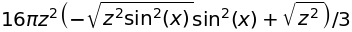

In [34]:
simplify(integrate(4* y * sqrt(4 * z ** 2 - y ** 2), (x, 0, pi / 2), (y, 0, 2 * z * cos(x))))

## 解方程（solve方法默认所有等式为0）

$x^2=1$

In [4]:
solve(x ** 2 -1, x)

$x+2x^2+3x^3=6$ 

In [5]:
solve(x + 2 * (x ** 2) + 3 * (x ** 3) - 6, x)

解方程组:$\begin{cases}2x - y = 3\\3x + y = 7\end{cases}$

In [7]:
solve([2 * x - y - 3, 3 * x + y - 7],[x, y])